In [55]:
import pandas as pd 
import numpy as np 
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as met


### Importing Data

In [56]:
CCData=pd.read_csv("CC.csv")

### Data Exploration 

0    284315
1       492
Name: Class, dtype: int64

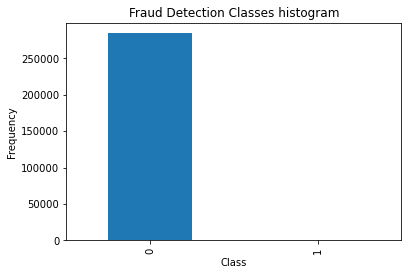

In [57]:
pd.value_counts(CCData['Class']).plot.bar()
plt.title('Fraud Detection Classes histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
CCData['Class'].value_counts()

### Description of the Data Set

In [58]:
print('Non Fraud Data Points are:' , round(CCData['Class'].value_counts()[0]/len(CCData)*100, 2), '% of the Data Points.')
print('Fraud Data Points are:' , round(CCData['Class'].value_counts()[1]/len(CCData)*100, 2), '% of the Data Points.')

Non Fraud Data Points are: 99.83 % of the Data Points.
Fraud Data Points are: 0.17 % of the Data Points.


### Scaling

In [59]:
std_scaler=StandardScaler()
CCData['SAmount']=std_scaler.fit_transform(CCData['Amount'].values.reshape(-1,1))
CCData['STime']=std_scaler.fit_transform(CCData['Time'].values.reshape(-1,1))
CCData.drop(['Time','Amount'],axis=1,inplace=True)
SCAmount= CCData['SAmount']
SCTime = CCData['STime']
CCData.drop(['SAmount', 'STime'], axis=1, inplace=True)
CCData.insert(1, 'SAmount', SCAmount)
CCData.insert(2, 'STime', SCTime)

In [60]:
CCData.head()

,V1,SAmount,STime,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,0.244964,-1.996583,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,-0.342475,-1.996583,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,1.160686,-1.996562,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,0.140534,-1.996562,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,-0.073403,-1.996541,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### Separation of input variables from target variable

In [61]:
CCFeature_names = CCData.iloc[:, 1:30].columns
targetClass = CCData.iloc[:1, 30:].columns

CCDataFeatures = CCData[CCFeature_names]
CCData_target = CCData[targetClass]

In [62]:
CCDataFeatures

,SAmount,STime,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.244964,-1.996583,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.342475,-1.996583,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.160686,-1.996562,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,0.140534,-1.996562,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-0.073403,-1.996541,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.350151,1.641931,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.254117,1.641952,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,-0.081839,1.641974,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.313249,1.641974,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [63]:
CCData_target

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


### Spliting the Training and Testing Datasets

In [64]:
X_train, X_test, y_train, y_test = train_test_split(CCDataFeatures, CCData_target,train_size = 0.80, test_size = 0.20, random_state = 1)

### Building the  Logistic Regression model

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [66]:
# pip install scikit-plot

In [67]:
Logistic=LogisticRegression()
#Training the logistic Regression Model
Logistic.fit(X_train, y_train)
y_pred = Logistic.predict(X_test)

/home/weldat/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Classification Report - Model performance measures

In [68]:
print("Evaluation Results of Decision Tree Classifier on the Skewed Data! ")
# Accuracy
print("Accuracy : ",met.accuracy_score(y_test, y_pred))
#Precision
print('Precision : ', met.precision_score(y_test, y_pred))
#F-1 Score 
print('F-1 Score : ',met.f1_score(y_test, y_pred))

#Recall= TP / [TP+FN] 
print('Recall/Sensitivity/ Score : ',met.recall_score(y_test,y_pred))


#Matthews Correlation Coefficient 
print('Matthews Correlation Coefficient : ',met.matthews_corrcoef(y_test, y_pred))

#Balanced classification Rate 
print('Balanced classification Rate: ',met.balanced_accuracy_score(y_test, y_pred))

Evaluation Results of Decision Tree Classifier on the Skewed Data! 
Accuracy :  0.9991573329588147
Precision :  0.8305084745762712
F-1 Score :  0.6712328767123288
Recall/Sensitivity/ Score :  0.5632183908045977
Matthews Correlation Coefficient :  0.6835463565545198
Balanced classification Rate:  0.7815212833143867


## Undersampling 

In [69]:
# The function "len" counts the number of classes = 1 and saves it as an object "fraud_records"
fraud_records = len(CCData[CCData.Class == 1])

# Defines the index for fraud and non-fraud in the lines:
fraud_indices = CCData[CCData.Class == 1].index
not_fraud_indices = CCData[CCData.Class == 0].index

# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(not_fraud_indices, fraud_records, False)
df_undersampled = CCData.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:31]
Y_undersampled = df_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

### Using the "new" classifier for balanced data

In [70]:
Logistic=LogisticRegression()
#Training the logistic Regression Model
Logistic.fit(X_undersampled_train, Y_undersampled_train)
yUnder_pred = Logistic.predict(X_undersampled_test)

In [71]:
print("Evaluation Results of Logistic Regression Model on Balanced Data! ")
# Accuracy Y_undersampled_test
print("Accuracy : ",met.accuracy_score(Y_undersampled_test, yUnder_pred))
#Precision
print('Precision : ', met.precision_score(Y_undersampled_test, yUnder_pred))
#F-1 Score 
print('F-1 Score : ',met.f1_score(Y_undersampled_test, yUnder_pred))

#Recall= TP / [TP+FN] 
print('Recall/Sensitivity/ Score : ',met.recall_score(Y_undersampled_test, yUnder_pred))

#Specificity -Similar to Recall but calculates for the Negative Score
   # Specificity= TN / [TN+FP] 


#Matthews Correlation Coefficient 
print('Matthews Correlation Coefficient : ',met.matthews_corrcoef(Y_undersampled_test, yUnder_pred))

#Balanced classification Rate 
print('Balanced classification Rate: ',met.balanced_accuracy_score(Y_undersampled_test, yUnder_pred))

Evaluation Results of Logistic Regression Model on Balanced Data! 
Accuracy :  0.9898648648648649
Precision :  0.986013986013986
F-1 Score :  0.9894736842105264
Recall/Sensitivity/ Score :  0.9929577464788732
Matthews Correlation Coefficient :  0.9797243549251777
Balanced classification Rate:  0.9899853667459302
